# LBF5x5-n2-f3-static-v2 Heuristic policies analysis 

In [1]:
import os.path as osp
from typing import List, Any, Optional, Tuple, Callable
from itertools import permutations, product

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import posggym_agents
import posggym_agents.exp.plot_utils as policy_plot_utils

from baposgmcp.run import plot_utils
from baposgmcp.config import BASE_REPO_DIR

baposgmcp_results_file = osp.join(
    BASE_REPO_DIR, "experiments", "lbf", "LBF5x5-n2-f3-static-v2", "results", "heuristic_results.csv"
)
policy_results_file = osp.join(
    posggym_agents.config.BASE_DIR, 'agents', "lbf5x5_n2_f3_static_v2", "results", "heuristic_pairwise_results.csv"
)

## Loading Heuristic Policy Data

In [2]:
policy_df = plot_utils.import_results(
    policy_results_file, clean_policy_id=True
)
policy_df.columns

policy_ids = policy_df["policy_id"].unique().tolist()
policy_ids.sort()
print(policy_ids)

['heuristic1-v0', 'heuristic2-v0', 'heuristic3-v0', 'heuristic4-v0']


## Loading BAPOSGMCP Data

In [3]:
baposgmcp_df = plot_utils.import_results(
    baposgmcp_results_file, clean_policy_id=True
)
policy_ids = baposgmcp_df["policy_id"].unique().tolist()
policy_ids.sort()
print(policy_ids)

for c in baposgmcp_df.columns:
    print(c)

['heuristic1-v0', 'heuristic2-v0', 'heuristic3-v0', 'heuristic4-v0', 'pi_baposgmcp']
Unnamed: 0
exp_id
agent_id
env_name
exp_seed
num_episodes
time_limit
episode_step_limit
policy_id
c_init
c_base
truncated
extra_particles_prop
step_limit
epsilon
discount
other_policy_ids
other_policy_dist
meta_policy_ids
meta_policy_dict
reinvigorator
num_sims
search_time_mean
search_time_std
update_time_mean
update_time_std
reinvigoration_time_mean
reinvigoration_time_std
policy_calls_mean
policy_calls_std
inference_time_mean
inference_time_std
search_depth_mean
search_depth_std
episode_returns_mean
episode_returns_std
episode_returns_max
episode_returns_min
episode_discounted_returns_mean
episode_discounted_returns_std
episode_discounted_returns_max
episode_discounted_returns_min
episode_steps_mean
episode_steps_std
episode_times_mean
episode_times_std
episode_dones
num_outcome_LOSS
num_outcome_DRAW
num_outcome_WIN
num_outcome_NA
search_time_CI
update_time_CI
reinvigoration_time_CI
policy_calls_CI
i

In [4]:
# Update BAPOSGMCP policy ID to include num sims

def add_num_sims_to_id(row):
    if row["policy_id"] == "pi_baposgmcp":
        return "baposgmcp_" + row["num_sims"]
    return row["policy_id"]

baposgmcp_df["policy_id"] = baposgmcp_df.apply(add_num_sims_to_id, axis=1)
policy_ids = baposgmcp_df["policy_id"].unique().tolist()
policy_ids.sort()
print(policy_ids)

['baposgmcp_16', 'baposgmcp_64', 'heuristic1-v0', 'heuristic2-v0', 'heuristic3-v0', 'heuristic4-v0']


## Combine data

In [5]:
# First need to update exp_ids of one dataframe so there are no duplicate exp_ids
df1 = baposgmcp_df
df2 = policy_df

df1_max_exp_id = df1["exp_id"].max()
if df2["exp_id"].min() <= df1_max_exp_id:
    df2["exp_id"] += df1_max_exp_id+1

combined_df = pd.concat([baposgmcp_df, policy_df]).reset_index(drop = True)
    
policy_ids = combined_df["policy_id"].unique().tolist()
policy_ids.sort()
print(policy_ids)

for c in combined_df.columns:
    print(c)

['baposgmcp_16', 'baposgmcp_64', 'heuristic1-v0', 'heuristic2-v0', 'heuristic3-v0', 'heuristic4-v0']
Unnamed: 0
exp_id
agent_id
env_name
exp_seed
num_episodes
time_limit
episode_step_limit
policy_id
c_init
c_base
truncated
extra_particles_prop
step_limit
epsilon
discount
other_policy_ids
other_policy_dist
meta_policy_ids
meta_policy_dict
reinvigorator
num_sims
search_time_mean
search_time_std
update_time_mean
update_time_std
reinvigoration_time_mean
reinvigoration_time_std
policy_calls_mean
policy_calls_std
inference_time_mean
inference_time_std
search_depth_mean
search_depth_std
episode_returns_mean
episode_returns_std
episode_returns_max
episode_returns_min
episode_discounted_returns_mean
episode_discounted_returns_std
episode_discounted_returns_max
episode_discounted_returns_min
episode_steps_mean
episode_steps_std
episode_times_mean
episode_times_std
episode_dones
num_outcome_LOSS
num_outcome_DRAW
num_outcome_WIN
num_outcome_NA
search_time_CI
update_time_CI
reinvigoration_time_CI
p

## Pairwise performance by number of simulations

Here we look at the performance of each policy against each other policy including BAPOSGMCP using different number of simulations.

<__array_function__ internals>:180: UserWarning: Warning: converting a masked element to nan.
/home/jonathon/miniconda3/envs/ba-posgmcp/lib/python3.8/site-packages/matplotlib/colors.py:1211: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)


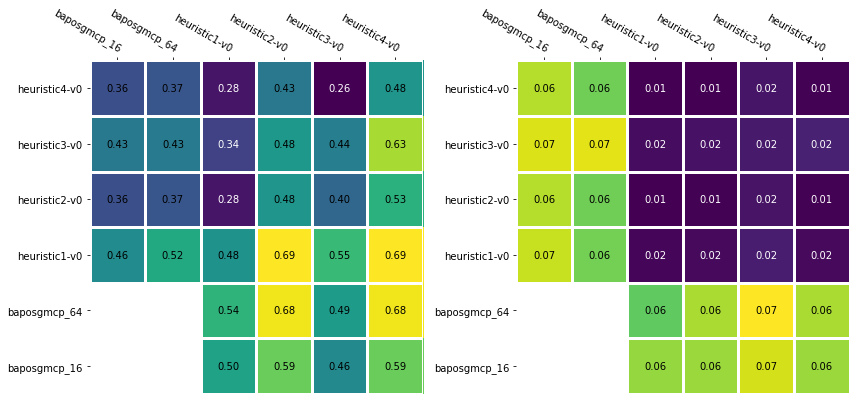

In [6]:
plot_utils.plot_pairwise_comparison(
    combined_df,
    # baposgmcp_df,
    y_key="episode_returns_mean", 
    policy_key="policy_id",
    y_err_key="episode_returns_CI",
    vrange=None, 
    figsize=(12, 16), 
    valfmt="{x:.2f}",
    average_duplicates=True,
    duplicate_warning=False
)

## Policy Prior Performance

Here we look at the expected performance against the policy prior of BAPOSGMCP.

In [8]:
# TODO check I'm adding confidence intervals correctly

policy_prior = {1: {
    "heuristic1-v0": 1/4,
    "heuristic2-v0": 1/4,
    "heuristic3-v0": 1/4,
    "heuristic4-v0": 1/4
}}
pw_values, policy_ids = plot_utils.get_pairwise_values(
    combined_df,
    y_key="episode_returns_mean", 
    policy_key="policy_id",
    average_duplicates=True,
    duplicate_warning=False
)
pw_err_values, _ = plot_utils.get_pairwise_values(
    combined_df,
    y_key="episode_returns_CI", 
    policy_key="policy_id",
    average_duplicates=True,
    duplicate_warning=False
)

expected_values = np.zeros(len(policy_ids))
expected_err_values = np.zeros(len(policy_ids))
for i, policy_id in enumerate(policy_ids):
    value = 0.0
    err_value = 0.0
    for coplayer_policy_id, prob in policy_prior[1].items():
        coplayer_idx = policy_ids.index(coplayer_policy_id)
        value += pw_values[i][coplayer_idx] * prob
        err_value += pw_err_values[i][coplayer_idx] * prob
    expected_values[i] = value
    expected_err_values[i] = err_value
    

for i, policy_id in enumerate(policy_ids):
    value = expected_values[i]
    err_value = expected_err_values[i]
    print(f"{policy_id} = {value:.2f} +/- {err_value:.2f}")



baposgmcp_16 = 0.53 +/- 0.06
baposgmcp_64 = 0.60 +/- 0.06
heuristic1-v0 = 0.60 +/- 0.02
heuristic2-v0 = 0.42 +/- 0.02
heuristic3-v0 = 0.47 +/- 0.02
heuristic4-v0 = 0.36 +/- 0.02
